In [14]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

## *Data preprocessing*
### We cant feed videos to CNN model directly. Since a video is just a series of frames the approach will be:
#### 1) Loop over all frames in the video file
#### 2) For each frame, pass the frame through the CNN
#### 3) Obtain the predictions from the CNN
#### 4) Maintain a list of the last K predictions
#### 5) Compute the average of the last K predictions and choose the label with the largest corresponding probability
#### 6) Label the frame and write the output frame to disk

## *Converting videos into frames and writing them in a seprate folder*

In [15]:
data_path = '/content/drive/MyDrive/Human activity /sample_videos'

### Labeling different categories

In [16]:
categoeries = os.listdir(data_path)
labels = [i for i in range(len(categoeries))]
label_dict = dict(zip(categoeries, labels))

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
print(label_dict)
print(categoeries)
print(labels)

{'Walkng_witthDog': 0, 'Handstand': 1, 'Fencing': 2, 'cricket': 3, 'Drumming': 4, 'typing': 5, 'writing_on_board': 6, 'tennis': 7, 'yo_yo': 8, 'Golf': 9, 'Bowling': 10, 'Boxing': 11, 'Brushing_Teeth': 12}
['Walkng_witthDog', 'Handstand', 'Fencing', 'cricket', 'Drumming', 'typing', 'writing_on_board', 'tennis', 'yo_yo', 'Golf', 'Bowling', 'Boxing', 'Brushing_Teeth']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [19]:
frames = '/content/drive/MyDrive/Human activity /frames'
if not os.path.exists(frames):
    os.makedirs(frames)

### For testing purpose we have short listed 10 activities the are:
#### 'Bowling', 'Boxing', 'Brushing_Teeth', 'Fencing', 'Handstand', 'tennis', 'typing', 'Walkng_witthDog', 'writing_on_board', 'yo_yo'

In [20]:
root_path = '/content/drive/MyDrive/Human activity /frames' # Path for writing frames from videos

In [21]:
data=[] # Appending images as array in the list
target=[] #Target list to make prediction

### Reducing dimensions of pixels to (100x100)

In [22]:
folder_count = 0
img_size=100
for items in categoeries: #looping over folders in categoeries
    path = os.path.join(root_path, items) 
    folder_path = os.path.join(data_path,items)
    img_names = os.listdir(folder_path) # Listing all files inside the directory
    os.mkdir(path)
    img_count= 0
    folder_count +=1
    
    for img_name in img_names:
            cap = cv2.VideoCapture(os.path.join(folder_path, img_name)) # Capcturing video and dividing it by frames
            success, image = cap.read()
            while success:
                success, image = cap.read()
                if not success:
                    break
                
                
                #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting coloured image to greyScale
                #norm = cv2.normalize(gray_image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX) # Normalize image
                #resized_up = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR) # Resizing image
                resized=cv2.resize(image,(img_size,img_size))
                cv2.imwrite(path + '/' + items +str(img_count) + '.jpg' , resized) # Writing image into to specified class with its class name 
                data.append(resized)
                target.append(label_dict[items])
                
                img_count += 1
            

In [ ]:
#frames_path = '/content/drive/MyDrive/Human activity /frames'

In [ ]:
#frames = os.listdir(frames_path)
#label = [i for i in range(len(frames))]

In [ ]:
#label_frames = dict(zip(frames,label))

In [ ]:
#print(label_frames)
#print(frames)
#print(label)

{'yo_yo': 0, 'typing': 1, 'Walkng_witthDog': 2, 'Fencing': 3, 'tennis': 4, 'writing_on_board': 5, 'Brushing_Teeth': 6, 'Handstand': 7, 'Boxing': 8, 'Bowling': 9}
['yo_yo', 'typing', 'Walkng_witthDog', 'Fencing', 'tennis', 'writing_on_board', 'Brushing_Teeth', 'Handstand', 'Boxing', 'Bowling']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:

#for frame in frames:
 #   frame_path = os.path.join(frames_path, frame)
  #  img_frames = os.listdir(frame_path)
    
   # for img_frame in img_frames:
    #    imgPath = os.path.join(frame_path, img_frame)
     #   frm = cv2.imread(imgPath)
      #  data.append(frm)
       # target.append(label_frames[frame])
        
    

### Recale and assign catagorical lables

In [23]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [24]:
data.shape

(10876, 100, 100, 3)

In [25]:
new_target.shape

(10876, 13)

## CNN

In [26]:
data.shape

(10876, 100, 100, 3)

In [27]:
data.shape[1:]

(100, 100, 3)

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(13,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [35]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.3)

In [36]:
train_data.shape

(7613, 100, 100, 3)

In [37]:
train_target.shape

(7613, 13)

In [38]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.3)

Epoch 1/200
167/167 [==============================] - 28s 107ms/step - loss: 0.3191 - accuracy: 0.9067 - val_loss: 3.3235e-04 - val_accuracy: 1.0000
Epoch 2/200
167/167 [==============================] - 16s 99ms/step - loss: 1.7912e-04 - accuracy: 1.0000 - val_loss: 8.6501e-05 - val_accuracy: 1.0000
Epoch 3/200
167/167 [==============================] - 17s 102ms/step - loss: 5.9602e-05 - accuracy: 1.0000 - val_loss: 4.6268e-05 - val_accuracy: 1.0000
Epoch 4/200
167/167 [==============================] - 17s 101ms/step - loss: 3.2124e-05 - accuracy: 1.0000 - val_loss: 2.9678e-05 - val_accuracy: 1.0000
Epoch 5/200
167/167 [==============================] - 17s 101ms/step - loss: 2.4482e-05 - accuracy: 1.0000 - val_loss: 1.8197e-05 - val_accuracy: 1.0000
Epoch 6/200
167/167 [==============================] - 17s 100ms/step - loss: 1.6430e-05 - accuracy: 1.0000 - val_loss: 1.3729e-05 - val_accuracy: 1.0000
Epoch 7/200
167/167 [==============================] - 17s 101ms/step - loss: 1.6

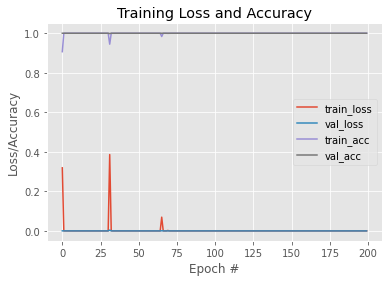

In [40]:
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right");

In [42]:
model.save("hra.h5")